In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = np.arange(2,52,2,dtype=np.int32) # Aperture (px)
r_in = np.copy(r) # Sky ring internal radius (px)
r_out = r+8
output_dir = './Data/IRAC_outputs/'
i = 0

In [3]:
r

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50], dtype=int32)

In [4]:
# for radius in r:
#     !python3 photUN.py IRAC -fd Data/IRAC/ -cad Data/Catalogs/ -od Data/IRAC_outputs/ -r {radius} -r_in {radius} -r_out {radius+8} -v

In [5]:
N_apert = r.shape[0]

first_df = pd.read_csv(output_dir+f'Table_IC348_r_{r[0]}_ranul_{r_in[0]}_{r_out[0]}.csv')
concat_mags = first_df[["RA", "DEC"]].copy()
concat_mags[f"1_mag_r{r[0]}"] = first_df["1_mag"]
for i in range(N_apert-1):
    next_df = pd.read_csv(output_dir+f'Table_IC348_r_{r[i+1]}_ranul_{r_in[i+1]}_{r_out[i+1]}.csv')[["RA", "DEC", "1_mag"]]

    idRA = concat_mags["RA"].isin(next_df["RA"])
    concat_mags = concat_mags.loc[idRA]

    idDEC = concat_mags["DEC"].isin(next_df["DEC"])
    concat_mags = concat_mags.loc[idDEC]

    concat_mags[f"1_mag_r{r[i+1]}"] = next_df["1_mag"]

concat_mags = concat_mags.reset_index(drop=True).dropna()
concat_mags

,RA,DEC,1_mag_r2,1_mag_r4,1_mag_r6,1_mag_r8,1_mag_r10,1_mag_r12,1_mag_r14,1_mag_r16,...,1_mag_r32,1_mag_r34,1_mag_r36,1_mag_r38,1_mag_r40,1_mag_r42,1_mag_r44,1_mag_r46,1_mag_r48,1_mag_r50
0,56.140769,31.975080,9.241713,8.652311,8.549330,8.490232,8.458818,8.439663,8.424041,8.417316,...,8.357709,8.357105,8.352973,8.351359,8.353691,8.352035,8.344056,8.335527,8.337782,8.343738
1,56.219711,32.015701,9.493787,8.884644,8.776801,8.735043,8.706278,8.686369,10.374758,10.372655,...,8.628017,8.630919,8.633903,8.630301,8.620114,8.612987,8.614701,8.619777,8.622429,7.728264
2,56.272601,32.052203,11.215200,11.098033,10.241100,8.667877,8.033267,7.931491,7.876695,7.865663,...,6.952395,7.748288,7.715644,7.710236,7.711756,7.719944,7.728152,7.726370,7.714995,6.981542
3,56.274025,32.052226,8.893379,8.269681,8.150928,8.024111,7.927329,7.894599,7.012689,7.001999,...,7.433394,6.950855,6.951942,6.952558,6.951935,6.949958,6.947730,6.948399,6.957269,7.442704
4,56.255887,32.083816,7.801040,7.209803,7.109902,7.070654,7.045558,7.028614,7.491566,7.482423,...,9.454754,7.431267,7.427945,7.425714,7.425397,7.426192,7.431512,7.437611,7.441877,9.360945
5,56.263269,32.068191,8.241093,7.677116,7.585725,7.546520,7.521938,7.505605,9.458693,9.438513,...,9.216437,9.468166,9.469806,9.456712,9.390464,9.381504,9.386649,9.369820,9.373182,6.164998
6,56.241019,32.067098,10.187687,9.680562,9.596951,9.562974,9.540180,9.509716,9.657824,9.342730,...,6.254351,9.228252,6.271496,6.258567,6.211048,6.179141,6.172720,6.168858,6.166170,6.233241
7,56.283178,32.067199,7.245307,6.532720,6.402106,6.351186,6.319663,6.298376,9.988257,10.004561,...,5.360564,10.763552,5.360217,5.368591,5.384111,11.294963,11.432020,11.358497,5.350668,10.994555
8,56.318102,32.105531,6.330671,5.631382,5.516493,5.475815,5.450997,5.436662,12.679573,12.233031,...,9.766578,9.305328,9.588404,9.615219,9.647593,9.247745,9.592033,9.266977,9.521741,9.542597
9,56.000832,31.972735,10.356040,8.723137,9.927161,7.168920,7.137905,7.115195,9.789366,10.051719,...,6.360135,6.354167,6.329899,6.330429,7.848294,6.775838,6.746666,7.493707,7.363151,7.281361


In [6]:
def minmax(arr):
    max_value = np.max(arr)
    min_value = np.min(arr)
    return (arr - min_value)/(max_value - min_value)

In [7]:
N_stars = len(concat_mags["RA"])
mag_values = np.zeros((N_stars, N_apert))

for istar in range(N_stars):
    for i in range(N_apert):
        mag_values[istar, i] = concat_mags[f"1_mag_r{r[i]}"][istar]
    mag_values[istar,:] = minmax(mag_values[istar,:])

mean_mag_values = np.zeros((r.shape[0]))
std_mag_values = np.zeros((r.shape[0]))

for i in range(N_apert):
    mean_mag_values[i] = np.mean(mag_values[:,i])
    std_mag_values[i] = np.std(mag_values[:,i])
std_mag_values

array([0.30011895, 0.27016304, 0.31988121, 0.29832313, 0.30066677,
       0.27236248, 0.30664614, 0.30468627, 0.30063305, 0.29806816,
       0.29110693, 0.29932107, 0.30284241, 0.29298286, 0.26896956,
       0.30104652, 0.29663141, 0.2832675 , 0.26212983, 0.24819504,
       0.2607235 , 0.25867696, 0.28783246, 0.24334798, 0.27139805])

In [8]:
r[np.argmax(mean_mag_values)]

14

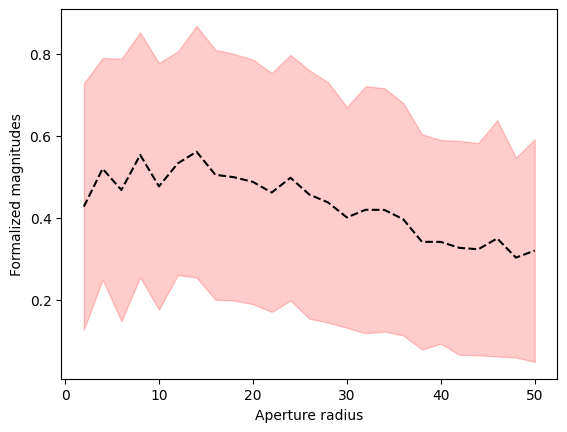

In [11]:

fig, ax = plt.subplots()
ax.plot(r, mean_mag_values, "k--")
sup_vals = np.add(mean_mag_values, std_mag_values)
low_vals = np.subtract(mean_mag_values, std_mag_values)
ax.fill_between(r, low_vals, sup_vals, alpha = 0.2, color = "red")
ax.set_ylabel("Formalized magnitudes")
ax.set_xlabel("Aperture radius")
fig.savefig("./outputs/aperture_plot.pdf")